In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
data = files.upload()
import io
import warnings
warnings.filterwarnings('ignore')

Saving Tweets.csv to Tweets (2).csv


# EDA


In [146]:
tweets = pd.read_csv('Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [147]:
tweets.shape

(14640, 15)

In [148]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [149]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

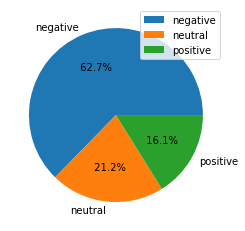

In [150]:
labels = ['negative' , 'neutral', 'positive']
plt.pie(tweets.groupby('airline_sentiment')['airline_sentiment'].count(), autopct=" %.1f%% " ,labels=labels)
plt.legend()
plt.show()

In [151]:
tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

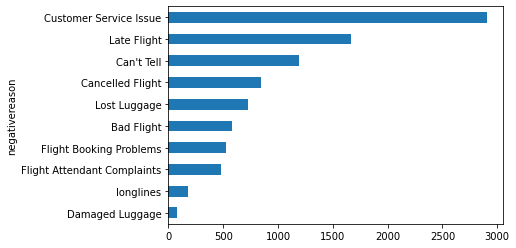

In [152]:
tweets.groupby('negativereason')['negativereason'].count().sort_values(ascending=True).plot.barh()

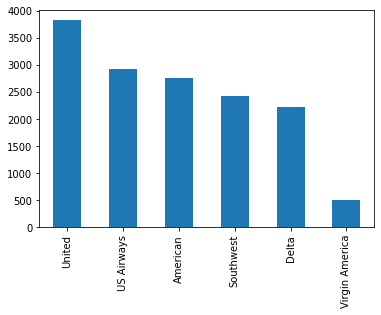

In [153]:
tweets['airline'].value_counts().plot(kind='bar')

In [154]:
tweets['name'].unique()

array(['cairdin', 'jnardino', 'yvonnalynn', ..., 'KristenReenders',
       'itsropes', 'sanyabun'], dtype=object)

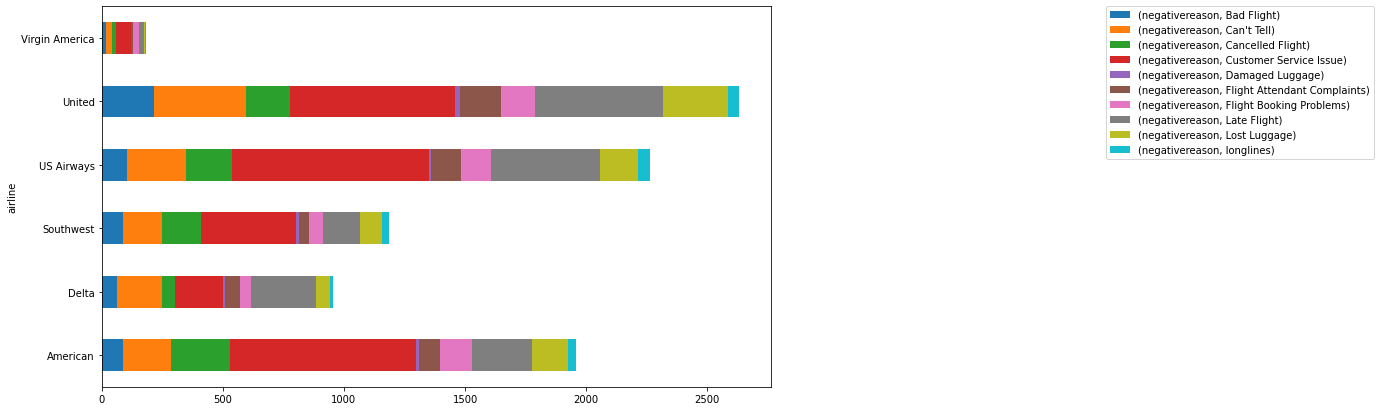

In [155]:
pd.DataFrame(tweets.groupby('airline')['negativereason'].value_counts()).unstack().plot.barh(figsize=(12,7) , stacked=True)
plt.legend(bbox_to_anchor=(1.5 , 1) , loc='upper left' , borderaxespad=0, fontsize=10)
plt.show()

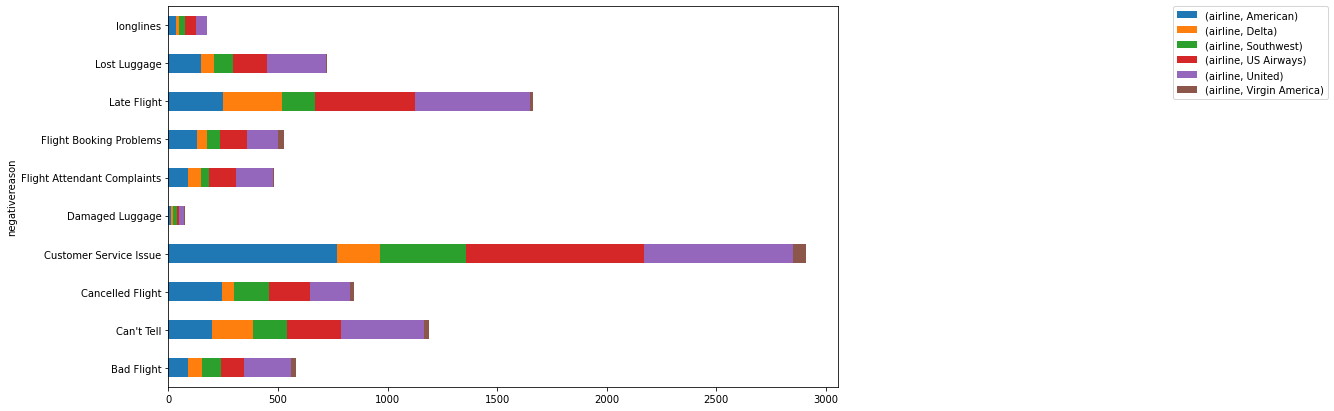

In [156]:
pd.DataFrame(tweets.groupby('negativereason')['airline'].value_counts()).unstack().plot.barh(figsize=(12,7) , stacked=True)
plt.legend(bbox_to_anchor=(1.5 , 1) , loc='upper left' , borderaxespad=0, fontsize=10)
plt.show()

In [157]:
tweets['tweet_location'].unique()

array([nan, 'Lets Play', 'San Francisco CA', ..., 'Columbus, OH, USA',
       'Milwaukee County, Wisconsin', 'Nigeria,lagos'], dtype=object)

In [158]:
import plotly.express as px
fig = px.pie(tweets, names='airline', title ='Pie chart of different types of airline')
fig.show()

 Total number of tweets for each airline 
  airline
Virgin America     504
Delta             2222
Southwest         2420
American          2759
US Airways        2913
United            3822
Name: airline_sentiment, dtype: int64


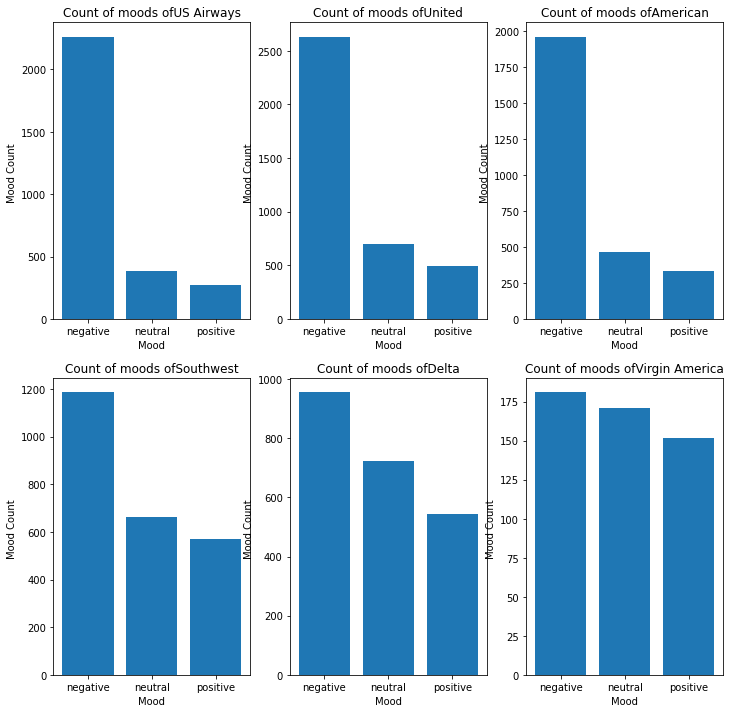

In [159]:
print(" Total number of tweets for each airline \n " , tweets.groupby('airline')['airline_sentiment'].count().sort_values(ascending=True))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1, figsize=(12,12))
for i in airlines:
  indices = airlines.index(i)
  plt.subplot(2,3, indices+1)
  df = tweets[tweets['airline'] == i]
  count = df['airline_sentiment'].value_counts()
  Index=[1,2,3]
  plt.bar(Index,count)
  plt.xticks(Index,['negative' , 'neutral' , 'positive'])
  plt.xlabel('Mood')
  plt.ylabel('Mood Count ')
  plt.title('Count of moods of'+i)

# Visualize negative data into Wordclouds

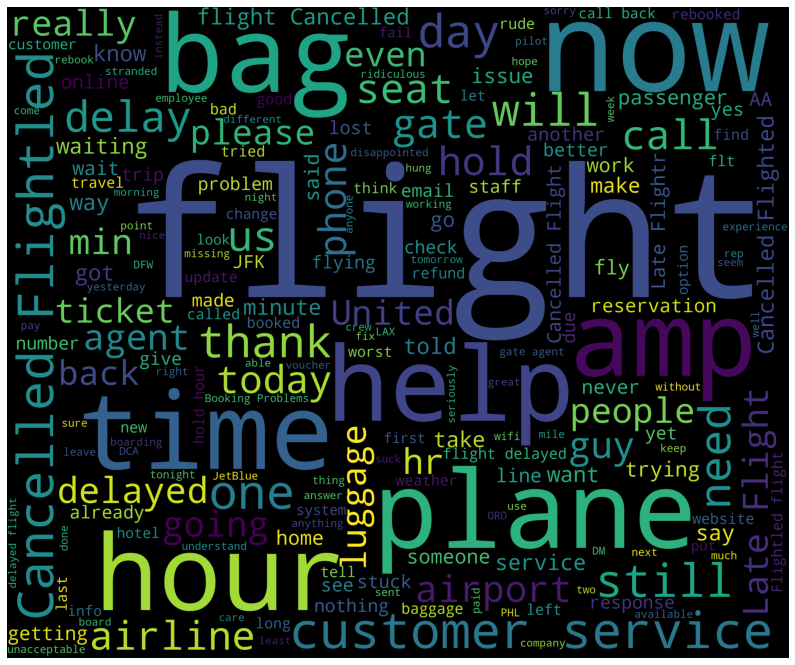

In [160]:
from wordcloud import WordCloud , STOPWORDS
df = tweets[tweets['airline_sentiment'] == 'negative']
words = ' '.join(df['text'])
cleaned_words= " ".join([
                         word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and word != 'RT'
])
wordcloud= WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=3000,
    height=2500
).generate(cleaned_words)
plt.figure(1, figsize=(14,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Visualize positive Words 

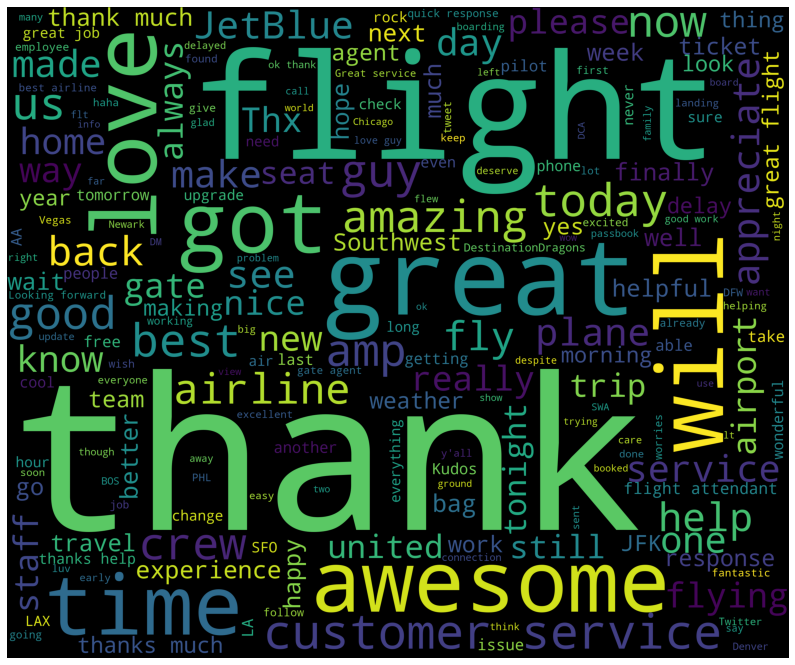

In [161]:
from wordcloud import WordCloud , STOPWORDS
df = tweets[tweets['airline_sentiment'] == 'positive']
words = ' '.join(df['text'])
cleaned_words= " ".join([
                         word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and word != 'RT'
])
wordcloud= WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=3000,
    height=2500
).generate(cleaned_words)
plt.figure(1, figsize=(14,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Visualize Neutral words 


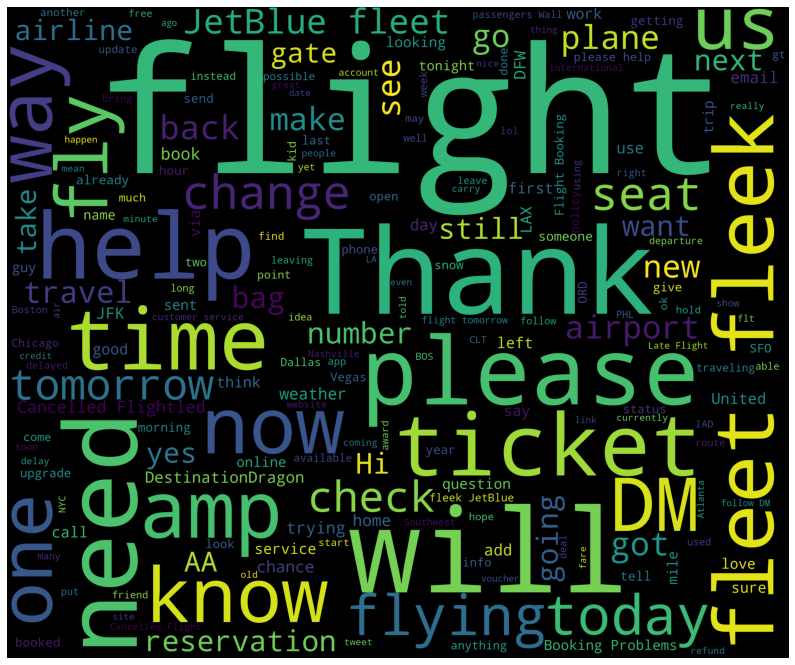

In [162]:
from wordcloud import WordCloud , STOPWORDS
df = tweets[tweets['airline_sentiment'] == 'neutral']
words = ' '.join(df['text'])
cleaned_words= " ".join([
                         word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and word != 'RT'
])
wordcloud= WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=3000,
    height=2500
).generate(cleaned_words)
plt.figure(1, figsize=(14,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Text Processing

In [163]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
import re
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [165]:
# write a function to remove '@' this and extract text from tweets
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [166]:
tweets['final_text'] = tweets['text'].apply(clean_the_tweet).apply(text_process)

In [167]:
tweets.final_text.head(10)

0                                        dhepburn said
1                   added commercials experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
5    would pay flight seats playing really bad thin...
6            nearly every time fly vx ear worm go away
7    missed prime opportunity men without hats paro...
8                                                     
9                      amazing arrived hour early good
Name: final_text, dtype: object

In [168]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# VADER
--- VADER Sentiment Analysis :
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
Below is the code: 



In [169]:
# adding important library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
  analyzer = SentimentIntensityAnalyzer()
  sentiment_dict = analyzer.polarity_scores(sentence)
  print(" overwall sentiment dictnory is: " , sentiment_dict)
  print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
  print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
  print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  print("Sentence Overall Rated As", end = " ")
  if sentiment_dict['compound'] >= 0.5:
    print("Positive")
  elif sentiment_dict['compound'] <= -0.5:
    print(" Negative ")
  else:
    print("Neutral")
  
print(" \n statement one : ")
sentiment_scores(tweets.final_text[12])
print(" \n statement two : ")
sentiment_scores(tweets.final_text[50])
print(" \n statement three : ")
sentiment_scores(tweets.final_text[75])
print(" \n statement four : ")
sentiment_scores(tweets.final_text[176])
print(" \n statement five : ")
sentiment_scores(tweets.final_text[299])
print(" \n statement six : ")
sentiment_scores(tweets.final_text[300])
print(" \n statement seven : ")
sentiment_scores(tweets.final_text[275])
print(" \n statement eight : ")
sentiment_scores(tweets.final_text[319])
print(" \n statement nine : ")
sentiment_scores(tweets.final_text[466])
print(" \n statement ten : ")
sentiment_scores(tweets.final_text[529])
print(" \n statement eleven : ")
sentiment_scores(tweets.final_text[3999])

 
 statement one : 
 overwall sentiment dictnory is:  {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  76.0 % Neutral
sentence was rated as  24.0 % Positive
Sentence Overall Rated As Positive
 
 statement two : 
 overwall sentiment dictnory is:  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  79.10000000000001 % Neutral
sentence was rated as  20.9 % Positive
Sentence Overall Rated As Neutral
 
 statement three : 
 overwall sentiment dictnory is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
 
 statement four : 
 overwall sentiment dictnory is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was ra

In [170]:
def convert_sentiment(sentiment):
  if sentiment == 'positive':
    return 2
  elif sentiment == 'neutral':
    return 1
  elif sentiment =='negative':
    return 0

tweets.airline_sentiment  = tweets.airline_sentiment.apply(lambda x: convert_sentiment(x))

# Train-test preparation


In [171]:
# adding important library
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

In [172]:
X=tweets.final_text
y=tweets.airline_sentiment

In [173]:
vectorizer = TfidfVectorizer(max_features=4 , use_idf=True)
X = vectorizer.fit_transform(X)

In [174]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , shuffle=True ,random_state=1)

In [175]:
X_train.shape

(10248, 4)

In [176]:
y_train.shape

(10248,)

In [177]:
# Adding important library
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score,precision_score
from sklearn.metrics import  classification_report , r2_score , mean_squared_error , mean_absolute_error , mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [178]:


def model_evaluation(algo , X_train , X_test , y_train , y_test):
  model = algo.fit(X_train , y_train)
  prediction = model.predict(X_test)
  accuracy = accuracy_score(y_test, prediction)
  recall = recall_score(y_test , prediction , average='macro')
  precision  = precision_score(y_test , prediction , average='macro')
  report = classification_report(y_test , prediction)
  r2 = r2_score(y_test , prediction)
  MSE = mean_squared_error(y_test , prediction)
  MAE  = mean_absolute_error(y_test , prediction)
  MAPE = mean_absolute_percentage_error(y_test , prediction)
  print("Accuracy: %.3f , Recall: %.3f , Precision: %.3f  "%(accuracy,recall, precision))
  print("\n *********** Report *****************\n")
  print(report)
  print('\n******************** R2 Score********\n')
  print(r2)
  print("\n ******************** Mean Squared Error  : MSE *************\n")
  print(MSE)
  print("\n******* Mean Absolute Error ******************\n")
  print(MAE)
  print("\n******* Mean Absolute Percentage Error ******************\n")
  print(MAPE)
  print("*****Confusion Matrix **********")
  cm = confusion_matrix(y_test , prediction)
  plt.figure(figsize=(9,8))
  sns.heatmap(cm,annot=True)
  plt.xlabel('Predicted values')
  plt.ylabel('Actual values')
  plt.show()

# Support Vector Machine 

Accuracy: 0.628 , Recall: 0.366 , Precision: 0.418  

 *********** Report *****************

              precision    recall  f1-score   support

           0       0.64      0.96      0.77      2741
           1       0.44      0.14      0.21       936
           2       0.17      0.00      0.01       715

    accuracy                           0.63      4392
   macro avg       0.42      0.37      0.33      4392
weighted avg       0.52      0.63      0.53      4392


******************** R2 Score********

-0.4388718300289791

 ******************** Mean Squared Error  : MSE *************

0.8260473588342441

******* Mean Absolute Error ******************

0.523224043715847

******* Mean Absolute Percentage Error ******************

118947531141844.05
*****Confusion Matrix **********


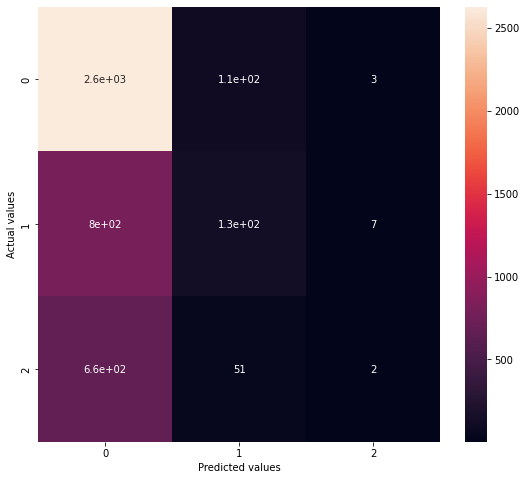

In [179]:
svc = SVC(probability=True)
model_evaluation(svc , X_train , X_test , y_train , y_test)

# Naive Bayes

In [180]:
from sklearn.naive_bayes import MultinomialNB ,BernoulliNB

Accuracy: 0.626 , Recall: 0.367 , Precision: 0.353  

 *********** Report *****************

              precision    recall  f1-score   support

           0       0.64      0.95      0.77      2741
           1       0.42      0.15      0.22       936
           2       0.00      0.00      0.00       715

    accuracy                           0.63      4392
   macro avg       0.35      0.37      0.33      4392
weighted avg       0.49      0.63      0.53      4392


******************** R2 Score********

-0.42499076220896415

 ******************** Mean Squared Error  : MSE *************

0.8180783242258652

******* Mean Absolute Error ******************

0.5220856102003643

******* Mean Absolute Percentage Error ******************

136379496912631.48
*****Confusion Matrix **********


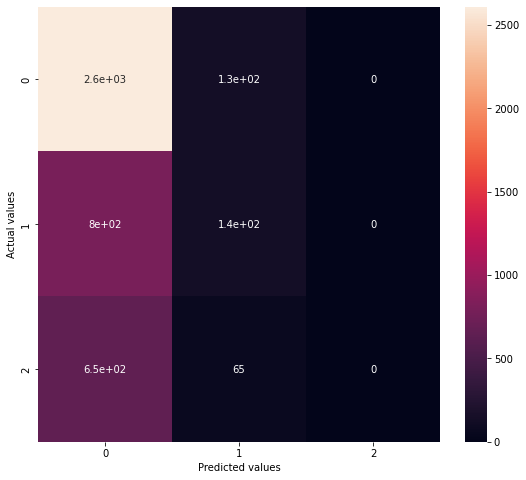

In [181]:
naive_1 = MultinomialNB()
model_evaluation(naive_1 , X_train , X_test , y_train , y_test)

Accuracy: 0.624 , Recall: 0.367 , Precision: 0.349  

 *********** Report *****************

              precision    recall  f1-score   support

           0       0.64      0.95      0.77      2741
           1       0.40      0.15      0.22       936
           2       0.00      0.00      0.00       715

    accuracy                           0.62      4392
   macro avg       0.35      0.37      0.33      4392
weighted avg       0.49      0.62      0.53      4392


******************** R2 Score********

-0.4245941602712493

 ******************** Mean Squared Error  : MSE *************

0.8178506375227687

******* Mean Absolute Error ******************

0.523224043715847

******* Mean Absolute Percentage Error ******************

147659004176082.2
*****Confusion Matrix **********


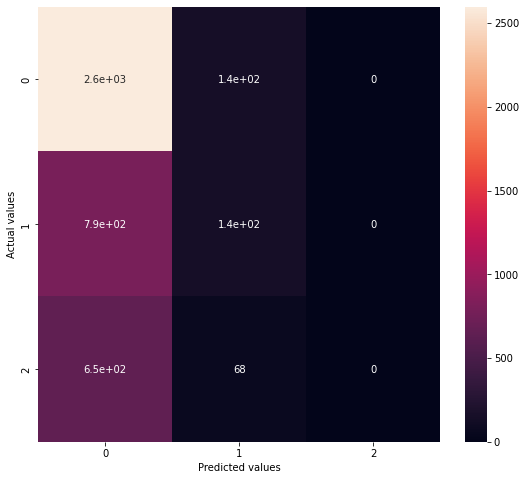

In [182]:
naive_2 = BernoulliNB()
model_evaluation(naive_2 , X_train , X_test , y_train , y_test)

# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.628 , Recall: 0.366 , Precision: 0.362  

 *********** Report *****************

              precision    recall  f1-score   support

           0       0.64      0.96      0.77      2741
           1       0.44      0.14      0.21       936
           2       0.00      0.00      0.00       715

    accuracy                           0.63      4392
   macro avg       0.36      0.37      0.33      4392
weighted avg       0.50      0.63      0.52      4392


******************** R2 Score********

-0.4372854222781202

 ******************** Mean Squared Error  : MSE *************

0.825136612021858

******* Mean Absolute Error ******************

0.5227686703096539

******* Mean Absolute Percentage Error ******************

112795072634507.31
*****Confusion Matrix **********


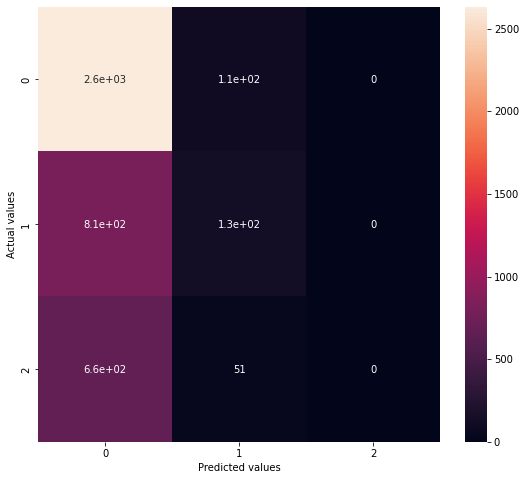

In [184]:
LR = LogisticRegression()
model_evaluation(LR , X_train , X_test , y_train , y_test)

#  WORD2VEC

In [185]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [186]:
from gensim.models import Word2Vec

In [187]:
text =  tweets.final_text.apply(word_tokenize).to_list()
model =  Word2Vec(
    sentences=text,
    window=5,
    min_count=1
)
model.epochs
model.corpus_count
model.train(text , total_examples=model.corpus_count
, epochs=model.epochs)
model.save('word2vec.model')

In [188]:
vector= model.wv['delay']
model.wv.most_similar('delay', topn=10)

[('delayed', 0.9674150943756104),
 ('stuck', 0.9667988419532776),
 ('unbalanced', 0.9648975729942322),
 ('hr', 0.964432954788208),
 ('tarmac', 0.9628548622131348),
 ('ua', 0.9615115523338318),
 ('almost', 0.9593828320503235),
 ('ordered', 0.9572304487228394),
 ('two', 0.9544129967689514),
 ('ten', 0.9534454941749573)]

In [189]:
model.wv.most_similar('appreciate', topn=10)

[('quick', 0.9935435652732849),
 ('jh', 0.9917146563529968),
 ('twitter', 0.991668164730072),
 ('clarification', 0.9899746179580688),
 ('address', 0.9899299740791321),
 ('emailed', 0.9896873235702515),
 ('thank', 0.9852044582366943),
 ('usairwayssucks', 0.985201358795166),
 ('much', 0.9842870831489563),
 ('generic', 0.9838366508483887)]

In [190]:
model.wv.most_similar('problem', topn=10)

[('explain', 0.9987648725509644),
 ('picked', 0.9984365105628967),
 ('correctly', 0.998308002948761),
 ('impossible', 0.9978247880935669),
 ('something', 0.9974309206008911),
 ('takes', 0.9973310828208923),
 ('also', 0.9973177909851074),
 ('frustrated', 0.9971968531608582),
 ('attempt', 0.9971277117729187),
 ('counter', 0.9971082210540771)]

In [191]:
model.wv.most_similar('trying', topn=10)

[('rebook', 0.9857257604598999),
 ('online', 0.9812029004096985),
 ('got', 0.980006217956543),
 ('yesterday', 0.9706432223320007),
 ('reschedule', 0.9698113203048706),
 ('getting', 0.9695085287094116),
 ('reservation', 0.9694093465805054),
 ('able', 0.9690870046615601),
 ('times', 0.9668362140655518),
 ('urgently', 0.9666168093681335)]

In [192]:
model.wv.most_similar('fail', topn=10)

[('seriously', 0.9984803795814514),
 ('pathetic', 0.9963193535804749),
 ('limit', 0.9961449503898621),
 ('reasonable', 0.9958891272544861),
 ('clients', 0.9956305027008057),
 ('accountability', 0.995523989200592),
 ('worstairlineever', 0.9953963160514832),
 ('unreal', 0.99515700340271),
 ('philadelphia', 0.9949489831924438),
 ('battery', 0.9945634603500366)]

In [193]:
model.wv.most_similar('thanks', topn=10)

[('received', 0.9920130968093872),
 ('tweet', 0.9904879331588745),
 ('sure', 0.9885352253913879),
 ('really', 0.9882240295410156),
 ('known', 0.9881423115730286),
 ('vp', 0.987876296043396),
 ('respond', 0.9877976775169373),
 ('prompt', 0.9876329302787781),
 ('anything', 0.9875898957252502),
 ('question', 0.9875049591064453)]

In [194]:
model.wv.most_similar('customer', topn=10)

[('tnx', 0.9507269263267517),
 ('overcharging', 0.9467347264289856),
 ('seasonal', 0.9413701891899109),
 ('recognized', 0.9299193024635315),
 ('abysmal', 0.924497663974762),
 ('courrier', 0.9205759763717651),
 ('installing', 0.9158322215080261),
 ('fifth', 0.9107888340950012),
 ('happytohelp', 0.9064705967903137),
 ('fendforyourself', 0.9057063460350037)]

In [195]:
model.wv.most_similar('service', topn=10)

[('relations', 0.942823588848114),
 ('favoriteairline', 0.9348543882369995),
 ('luvforsw', 0.9337414503097534),
 ('lou', 0.9186850190162659),
 ('astounded', 0.9048594236373901),
 ('norush', 0.9035701155662537),
 ('inquiries', 0.896976113319397),
 ('dang', 0.8960292339324951),
 ('signal', 0.8901872038841248),
 ('crickets', 0.8883509635925293)]

In [196]:
model.wv.most_similar('missing', topn=10)

[('onto', 0.9965123534202576),
 ('destination', 0.9958583116531372),
 ('bc', 0.9954588413238525),
 ('ugh', 0.995265781879425),
 ('strand', 0.9948740005493164),
 ('stand', 0.9945845603942871),
 ('nearly', 0.9945458173751831),
 ('slept', 0.9944784641265869),
 ('turns', 0.9944326877593994),
 ('buffalo', 0.9940569996833801)]

In [197]:
model.wv.most_similar('website', topn=10)

[('saying', 0.9911776781082153),
 ('error', 0.99094557762146),
 ('assistance', 0.9906377196311951),
 ('confirm', 0.9903795123100281),
 ('answering', 0.9903459548950195),
 ('locator', 0.9901255369186401),
 ('calls', 0.9889312982559204),
 ('asked', 0.988916277885437),
 ('nothing', 0.9884082078933716),
 ('assist', 0.9883887767791748)]